# Models for Student Performance on Examinations Data:

In [2]:
# Imports:

#Basic Imports:
import pandas as pd
import numpy as np

# Plotting Imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import tree

# Preprocessing Imports
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from random import shuffle
import random
random.seed(123)

# Metrics Import
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import classification_report 
from sklearn import metrics

# ML Model Imports
import lightgbm as lgb
from lightgbm import LGBMRegressor 
import xgboost as xgb 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import svm
from sklearn.linear_model import LinearRegression
from pylab import rcParams

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn import datasets
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.decomposition import PCA

In [3]:
pip install mlxtend

In [4]:
from mlxtend.evaluate import bias_variance_decomp

In [5]:
import warnings
warnings.filterwarnings('ignore')

### Important Functions:

In [6]:
#Function for Performance Metrics:
def reg_metrics(y_test, y_pred, filename):
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    r2 = r2_score(y_test,y_pred)

    print('Prediction for the testing set:')
    print('MAE is: {}'.format(mae))
    print('MSE is: {}'.format(mse))
    print('RMSE is: {}'.format(rmse))
    print('R^2 is: {}'.format(r2))
    
    with open(f'../Data/baseline_results/{filename}.txt', 'w') as f:
        f.write('Metric Predictions for the Testing Set:')
        f.write('\nMAE is: {}'.format(mae))
        f.write('\nMSE is: {}'.format(mse))
        f.write('\nRMSE is: {}'.format(rmse))
        f.write('\nR^2 is: {}'.format(r2))

In [7]:
def get_baseline_results_for_single_classifier(data, target_col, clf, filename):
    X, y = data.drop(target_col, axis=1), data[target_col]
    X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.2)
    clf = clf.fit(X_tr, y_tr)
    y_pred = clf.predict(X_te)
    report = classification_report(y_te, y_pred, output_dict=True)
    pd.DataFrame(report).transpose().to_csv(f'../Data/baseline_results/{filename}.csv')
    return report

In [15]:
def decompose_error(model, data, target_name, loss='mse'):
    X, y = data.drop(target_name, axis=1), data[target_name]
    X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.2)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        model, X_tr.values, y_tr.values, X_te.values, y_te.values, 
        loss=loss,
        random_seed=42)
    print("Average Expected Loss: ", avg_expected_loss)
    print("Average Bias: ", avg_bias)
    print("Average Variance: ", avg_var)
    
    return avg_expected_loss, avg_bias, avg_var

### Reading in One Hot Encoded Data/CSV File:

In [9]:
df = pd.read_csv('../Data/dataOneHotNorm.csv')
#df = pd.read_csv('../Data/test.csv')
df

,math score,reading score,writing score,average score,Overall_Pass_Status,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,...,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,0.390024,0.193999,0.391492,0.343574,1,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
1,0.192076,1.427476,1.313269,1.021927,1,1,0,0,0,1,...,0,0,0,0,1,0,0,1,1,0
2,1.577711,1.770109,1.642475,1.747064,1,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
3,-1.259543,-0.833899,-1.583744,-1.293830,0,0,1,1,0,0,...,1,0,0,0,0,0,1,0,0,1
4,0.653954,0.605158,0.457333,0.600881,1,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.445746,2.044215,1.774157,1.840630,1,1,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
996,-0.269803,-0.970952,-0.859491,-0.732434,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
997,-0.467751,0.125472,-0.201079,-0.194430,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
998,0.126093,0.605158,0.589015,0.460532,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0


## Linear Regression: <a id = 'linearreg'></a>

I am creating a linear regression model to determine if one can use categorical features--gender, race/ethnicity, parental level of education, having or not having lunch, and taking or not taking a test preparation course--to predict student performance on an examination.

### Splitting the Dataset: <a id = 'linsplit'></a>

In [10]:
#The dataset will be split into a training set with 80% of samples and a test set with 20% of samples
#The training set is used to learn model parameters and the testing set is used to evaluate the learned model

#Splitting the samples:
student_performance_fea = df.drop(['reading score','writing score','math score','average score', 'Overall_Pass_Status'], axis=1).values
target = df['average score'].values

X_train, X_test, Y_train, Y_test = train_test_split(student_performance_fea,
                                                 target,
                                                 test_size=0.2,
                                                 random_state=42)
print(X_train.shape)
print(X_test.shape)
#It makes sense that there are 800 values in the training set because this is 80% of the total number of values.
#It then also makes sense that there are 200 values in the testing set because this is 20% of the total number of values.

#ASK BEN ABOUT THIS!!!!!!
# Normalizing the features: (Completed in Preprocessing)
#normalizer = StandardScaler()
#X_train = normalizer.fit_transform(X_train)
#X_test = normalizer.transform(X_test)

(800, 17)
(200, 17)


### Training the linear regression model:

I will use the Linear regression model to do prediction

$\min_{w}\frac{1}{n}\|y-X\mathbf{w}\|_2^2$

I will output the learned model parameter $\mathbf{w}$ and see how the learned model fit the training set. 

In [11]:
#Training the model:

lr = LinearRegression()

lr.fit(X_train,Y_train)

print("For learned model parameter w: ")
print("Bias is " + str(lr.intercept_))
print("Coefficients are " + str(lr.coef_))

Y_train_pred = lr.predict(X_train)

mae = mean_absolute_error(Y_train_pred, Y_train)
mse = mean_squared_error(Y_train_pred, Y_train)
rmse = np.sqrt(mse)

print('Prediction for the training set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))

For learned model parameter w: 
Bias is 7869396478452.202
Coefficients are [-5.07082419e+12 -5.07082419e+12 -2.06766750e+12 -2.06766750e+12
 -2.06766750e+12 -2.06766750e+12 -2.06766750e+12 -2.65186231e+11
 -2.65186231e+11 -2.65186231e+11 -2.65186231e+11 -2.65186231e+11
 -2.65186231e+11 -1.42475015e+12 -1.42475015e+12  9.59031596e+11
  9.59031596e+11]
Prediction for the training set:
MAE is: 0.6972834753903757
MSE is: 0.7324268414083636
RMSE is: 0.8558193976583865


While not much information can be collected from these scores alone, they wil be compared to results from other models such as Ridge Regression, SVM, and Random Forest Regression to determine their validity.

### Evaluating the linear regression model:


I will evaluate the learned model to see how well this model generalizes on the testing set. 

Prediction for the testing set:
MAE is: 0.7362663473345467
MSE is: 0.8849115236239018
RMSE is: 0.9406973602726341
R^2 is: 0.16172899266096896


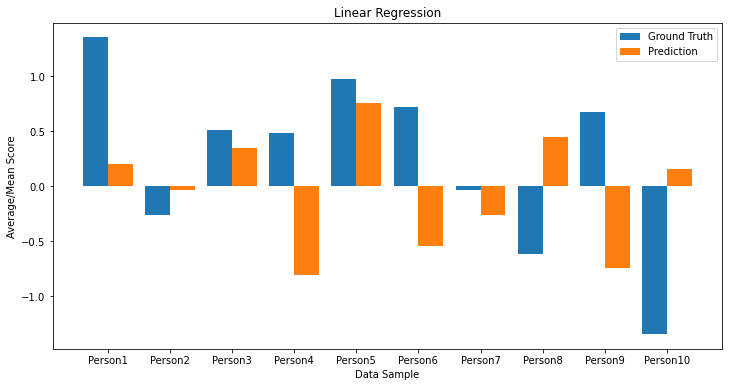

In [12]:
#Evaluating the model to see how well it generalizes on the testing set:

Y_test_pred = lr.predict(X_test)

# mae = mean_absolute_error(Y_test, Y_test_pred)
# mse = mean_squared_error(Y_test, Y_test_pred)
# rmse = np.sqrt(mse)

# print('Prediction for the testing set:')
# print('MAE is: {}'.format(mae))
# print('MSE is: {}'.format(mse))
# print('RMSE is: {}'.format(rmse))

reg_metrics(Y_test, Y_test_pred, 'LinearRegression')

labels = ['Person1', 'Person2', 'Person3', 'Person4', 'Person5', 'Person6', 'Person7', 'Person8', 'Person9', 'Person10']
x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize = (12,6))
rects1 = ax.bar(x - width/2, Y_test[0:10], width, label='Ground Truth')
rects2 = ax.bar(x + width/2, Y_test_pred[0:10], width, label='Prediction')

ax.set_title("Linear Regression")
ax.set_xlabel("Data Sample")
ax.set_ylabel('Average/Mean Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()
#From this plot, we can see the learned model does well to generalize on the testing set.

By comparing the ground truth and prediction for a sample of the data, one can see that the learned linear regression model does well to generalize on the testing set. In other words, it is satisfactory to use the categorical features in the dataset to predict student performance on examinations.

In [17]:
student_performance

,average score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,0.343574,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1.021927,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,1.747064,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,-1.293830,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0.600881,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.840630,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
996,-0.732434,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
997,-0.194430,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
998,0.460532,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0


In [19]:
student_performance = df.drop(['reading score','writing score','math score','Overall_Pass_Status'], axis=1)
lr = LinearRegression()
avg_expected_loss_lr, avg_bias_lr, avg_var_lr = decompose_error(lr, student_performance, 'average score', loss='mse')

Average Expected Loss:  0.9041566730971085
Average Bias:  0.8903565486514701
Average Variance:  0.013800124445638209


In [8]:
# report = classification_report(Y_test, Y_test_pred, output_dict=True)
# filename = 'LinearRegression'
# pd.DataFrame(report).transpose().to_csv(f'../Data/baseline_results/{filename}.csv')
# pd.DataFrame(report).transpose().head()

## Ridge Regression: <a id = 'ridge'></a>

### Training the Ridge Regression Model: <a id = 'ridgetrain'></a>
$\min_{w}\frac{1}{n}\|y-Xw\|_2^2 + \lambda \|w\|_2^2$

I will compare its performance on the testing set with that of the standard linear regression model $\min_{w}\frac{1}{n}\|y-Xw\|_2^2$

I will also use different $\lambda$ to see how it affects the performance of the ridge regression  model on the testing set


In [9]:
#Training the model with Ridge Regression:

rr = Ridge(alpha = 0.1)

rr.fit(X_train,Y_train)

print("For learned model parameter w: ")
print("Bias is " + str(rr.intercept_))
print("Coefficients are " + str(rr.coef_))

Y_train_pred2 = rr.predict(X_train)

mae2 = mean_absolute_error(Y_train_pred2, Y_train)
mse2 = mean_squared_error(Y_train_pred2, Y_train)
rmse2 = np.sqrt(mse2)


print('Prediction for the training set:')
print('MAE is: {}'.format(mae2))
print('MSE is: {}'.format(mse2))
print('RMSE is: {}'.format(rmse2))

#Using Ridge Regression the prediction values for the training set for MAE, MSE, and RMSE are almost idential for the values for Linear Regression

For learned model parameter w: 
Bias is 0.046846564894008624
Coefficients are [ 0.14354416 -0.14354416 -0.1474708  -0.15737787 -0.08318322  0.11761921
  0.27041268  0.0392748   0.28474668 -0.28736377  0.1742536  -0.02063756
 -0.19027375 -0.32297984  0.32297984  0.27633863 -0.27633863]
Prediction for the training set:
MAE is: 0.6972584872333282
MSE is: 0.7324347912582064
RMSE is: 0.8558240422295966


Similar to the linear regression model, not much information can be gathered from these scores/values alone. Thus, they will be compared to the other models I create to determine their validity.

### Evaluating the Ridge Regression Model: <a id = 'rideval'></a>

Prediction for the testing set:
MAE is: 0.7361628270206926
MSE is: 0.884467818053324
RMSE is: 0.9404614920629786
R^2 is: 0.16214931210046168


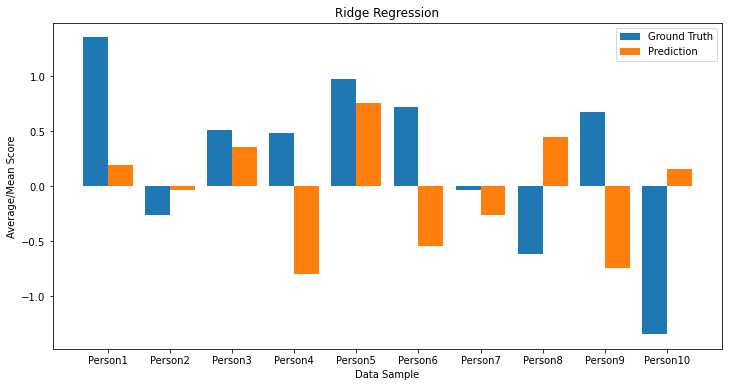

Percent Difference between Ridge Regression and Linear Regression: 
Percent Difference for MAE is: 0.003583708158990391%
Percent Difference for MSE is: 0.0010854062480151493%
Percent Difference for RMSE is: 0.0005427031240082678%


In [10]:
#Evaluating the model to see how well it generalizes on the testing set:

Y_test_pred2 = rr.predict(X_test)

# mae2 = mean_absolute_error(Y_test, Y_test_pred2)
# mse2 = mean_squared_error(Y_test, Y_test_pred2)
# rmse2 = np.sqrt(mse2)

# print('Prediction for the testing set:')
# print('MAE is: {}'.format(mae2))
# print('MSE is: {}'.format(mse2))
# print('RMSE is: {}'.format(rmse2))

reg_metrics(Y_test, Y_test_pred2, 'RidgeRegression')

labels = ['Person1', 'Person2', 'Person3', 'Person4', 'Person5', 'Person6', 'Person7', 'Person8', 'Person9', 'Person10']
x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize = (12,6))
rects1 = ax.bar(x - width/2, Y_test[0:10], width, label='Ground Truth')
rects2 = ax.bar(x + width/2, Y_test_pred2[0:10], width, label='Prediction')

ax.set_title("Ridge Regression")
ax.set_xlabel("Data Sample")
ax.set_ylabel('Average/Mean Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()
#From this plot, we can see the learned model does well to generalize on the testing set.

#The Ridge Regression and Linear Regression produce almost identifical adults with alpha =0.1, so both perform well. 
#To compare the ridge regression and linear regression models, I will use percent difference calculations:
#Percent Difference = (|Value 1 – Value 2|)/([Value 1 + Value 2]/2) * 100%

print("Percent Difference between Ridge Regression and Linear Regression: ")
maepd = ( (abs(mae - mae2))/((mae + mae2)/2) ) * 100
msepd = ( (abs(mse - mse2))/((mse + mse2)/2) ) * 100
rmsepd = ( (abs(rmse - rmse2))/((rmse + rmse2)/2) ) * 100
print("Percent Difference for MAE is: {}%".format(maepd))
print("Percent Difference for MSE is: {}%".format(msepd))
print("Percent Difference for RMSE is: {}%".format(rmsepd))
#Since these percent difference values are so small, one can say that ridge regression and linear regression perform almost identically



#I was unable to show the work of me changing the alpha values.
#It would not print out the updates error values for the new alpha values.
#However, by testing different lambdas, one notices that as lambda values increases, the performance of the ridge regression model on the testing set worsens.
#This is because if one's lambda value is too high, the model will be simple, but they run the risk of underfitting the data. It will not learn enough about the training data to make useful predictions
#Lambda values becoming incrementally smaller than 0.1 were also tested. 
#Once the lambda values became extremely small, the model became more complex and ran the risk of overfitting the data.

By comparing the ground truth and prediction for a sample of the data, one can see that the learned ridge regression model does well to generalize on the testing set. In other words, it is satisfactory to use the categorical features in the dataset to predict student performance on examinations. Also, the small percent difference values between the ridge and linear regression models suggest they perform very similarly.

In [11]:
# report = classification_report(Y_test, Y_test_pred2, output_dict=True)
# filename = 'RidgeRegression'
# pd.DataFrame(report).transpose().to_csv(f'../Data/baseline_results/{filename}.csv')
# pd.DataFrame(report).transpose().head()

## Logistic Regression #1: Student Exam Pass Status Based on Categorical Features: <a id = 'logisticcat'></a>

Here, I will build a logisitic regression model to determine which categorical features do the best job at classifying students as passing or failing their examinations. I will use the extended dataframe I made so that I have access to Pass/Fail status

### Splitting the Dataset: <a id = 'logisticcatsplit'></a>

In [12]:
#Splitting the samples:
target_fea = df.drop(['math score', 'reading score', 'writing score', 'average score', 'Overall_Pass_Status'], axis=1).values
target_prediction = df['Overall_Pass_Status'].values


#Here, we use 20% of samples as the testing set and use the remaining samples to train the logistic regression model.
#Thus, there are 200 of the samples in the testing set and 800 of the samples to train the logistic regression model. This is important for later so that we can evenly split into 10 folds.
X_train_val, X_test, y_train_val, y_test = train_test_split(target_fea, target_prediction, 
                                                            test_size=0.20, 
                                                            random_state=0)
print("train_val: {}, test: {}".format(X_train_val.shape[0], X_test.shape[0]))

#Normalizing the features:
# normalizer = StandardScaler()
# X_train_val = normalizer.fit_transform(X_train_val)
# X_test = normalizer.transform(X_test)

print(X_test.shape)
print(X_train_val.shape)

train_val: 800, test: 200
(200, 17)
(800, 17)


### Training the logistic regression model and selecting the hyperparameter with cross-validation: <a id = 'logisticcattrain'></a>

\begin{equation}
	\min_{\mathbf{w}} \sum_{i=1}^{n}\{\log(1+\exp(\mathbf{w}^T\mathbf{x}_i))-y_i\mathbf{w}^T\mathbf{x}_i \} + \lambda\|\mathbf{w}\|_2^2
\end{equation}

* I will use the 10-fold cross-validation to select the hyperparameter $\lambda$.
* Furthermore, I will search $\lambda$ from $\{10^{-5}, 10^{-4}, 10^{-3}, 10^{-2}, 10^{-1}, 1, 10, 20, 50, 100\}$


In [13]:
#We need to learn the model parameter  𝐰 . 
#However, with different hyperparameters  𝜆 , we can get different model parameter  𝐰 , resulting in different prediction performance. 
#Thus, we will use the 10-fold cross-validation to select the hyperparameter  𝜆 .

#Here we set the folds equal to 10 for 10-fold cross-validation
folds = 10

#We get the number of samples in the training and validation set
num_train_val = X_train_val.shape[0] 

#Now, we shuffle the index of samples in the train_val set
index_of_samples = np.arange(num_train_val) 
shuffle(index_of_samples)

#We split the index of the train_valid set into 10 folds
index_of_folds = index_of_samples.reshape(folds, -1)
print(index_of_folds)

#As suggested above, the hyperparameters chosen are listed below
regularization_coefficient = [10**(-5), 10**(-3), 10**(-2), 10**(-1), 1, 10, 20, 50, 100]

#Variables we create to store the values of the best accuracy and best regression:
best_acc = 0.0
best_reg = 0.0

for reg in regularization_coefficient:
    #10-fold cross-validation
    sum_acc = 0.0
    for fold in range(folds):
        
        index_of_folds_temp = index_of_folds.copy()
        
        #We are getting the index of the validation set and storing it in a variable valid_index
        valid_index = index_of_folds_temp[fold,:].reshape(-1) 
        #We are getting the index of the training set and storing it in a variable train_index
        train_index = np.delete(index_of_folds_temp, fold, 0).reshape(-1)
        
        #Our training set:
        X_train = X_train_val[train_index]
        y_train = y_train_val[train_index]
        
        #Our validation set:
        X_valid = X_train_val[valid_index]
        y_valid = y_train_val[valid_index]
                
        #We write this to build the model with different hyperparameters:
        clf = LogisticRegression(penalty='l2', C=reg, solver='lbfgs')
        
        #Train the model with the training set:
        clf.fit(X_train, y_train)
        
        y_valid_pred = clf.predict(X_valid)
        acc = accuracy_score(y_valid, y_valid_pred)
        
        sum_acc += acc
    
    cur_acc = sum_acc / folds
    
    print("reg_coeff: {}, acc: {:.3f}".format(1.0/reg, cur_acc))
    
    #We now want to store the best hyperparameter:
    if cur_acc > best_acc:
        best_acc = cur_acc
        best_reg = reg
        
print("Best Accuracy: {:.4f} ".format(best_acc))
print("Best Reg: {:}".format(best_reg))


[[726 300 371  35 774  88 131   9 434 688 568 103 327 700 705 267 690 523
  275 736 393 292 775  97 521 562 412  20 365 317 355 651 538 441 177 537
  350 658 572 368 124 729 130 135 668 447 767 642 696 194  81 265 328 464
  296 178 662 753  76 556 295 759 403 118 640  59 228 232   3 420 128 585
  433 119 519 224 503 628 432 532]
 [366 165 469 737 437 492 256 416 394  38 744 741 666 276 347 606 253  27
  734 287 203 577 545 633 151 677 121 414 716 336 320 153 581 468 423 435
  302 425 190 142 500 712 515 133 299 156  26 242 159 505 192 458  55 404
  496 671 318 161 613 748 289 689 743 173 667 209 379  11 288 781 681  51
  409 171 401 670 462 605 152 390]
 [ 79 552 594 481 779 175 100 463 479 245 576 570 655  43 602 457 450 326
  309 187 184 470 698 678 402 284 191 573 614 484  91 246 354 250 795 315
  216 269  60 321 501 168 241 785 788 301 448 210 571 625 316 593 202 132
  499 158 451 257 431 290 738 644  14 333  18 293  69 231 154 411 426  25
  436 507  49 362 247 510 723 599]
 [233 1

### Retraining and Evaluating the Model with the Best Hyperparamter: <a id = 'logisticcatretrain'></a>

accuracy: 0.635, recall: 0.769, precision: 0.674, f1: 0.718,
Our learned model parameter vector 'w':  [0.12782963 0.12781264 0.62259866 0.08529146 0.03657393 0.26340748
 0.48107356 0.0508032  0.41698111 0.37408864 0.33350303 0.12621028
 0.45178559 0.58476469 0.58478168 0.44639561 0.44637862]


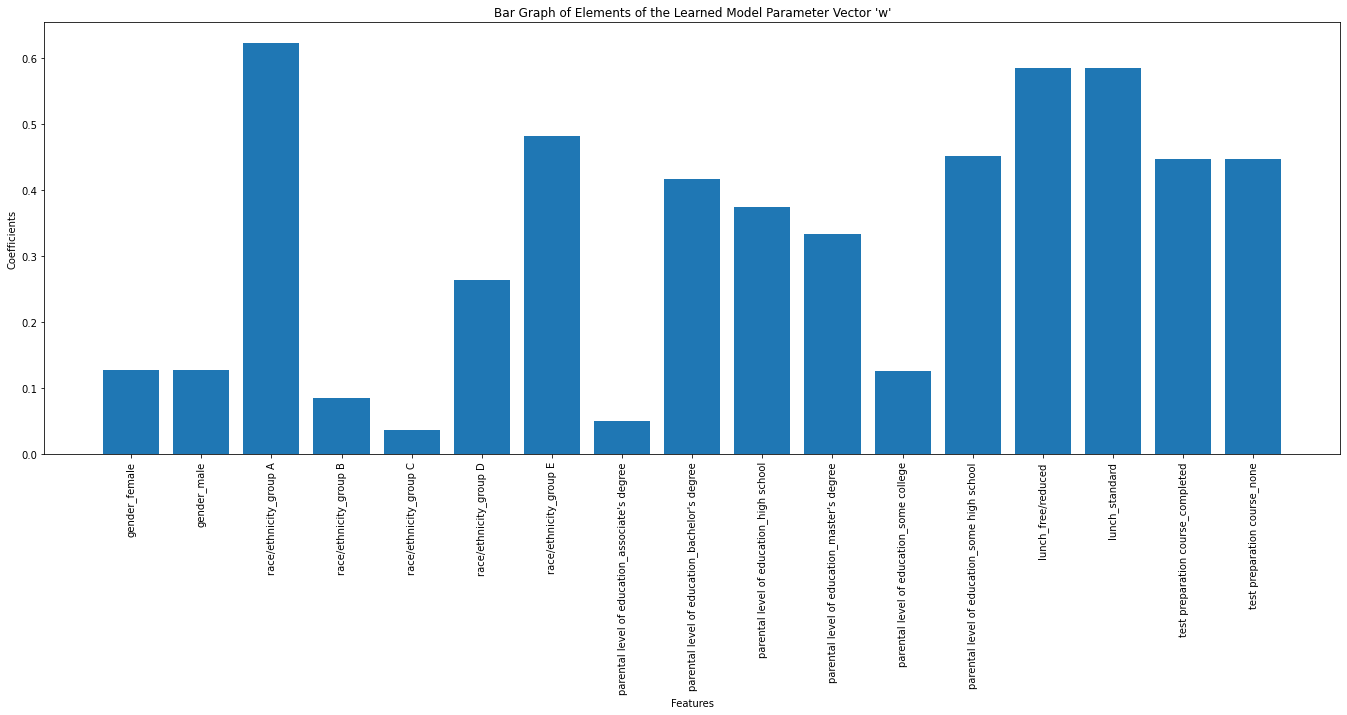

In [14]:
#Now that we have the best hyperparameter, we retrain the model:
clf = LogisticRegression(penalty='l2', C=best_reg, solver='lbfgs')
clf.fit(X_train_val, y_train_val)

# evaluate the model on the testing set
y_test_pred = clf.predict(X_test)


acc = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)

#Visualizing the elements of the learned model parameter vector w with a bar plot:
print("accuracy: {:.3f}, recall: {:.3f}, precision: {:.3f}, f1: {:.3f},".format(acc, recall, precision, f1))

print("Our learned model parameter vector 'w': ", abs(clf.coef_[0]))

fig = plt.figure(figsize=(18,6))
ax = fig.add_axes([0,0,1,1])
labels = df.drop(['math score', 'reading score', 'writing score', 'average score', 'Overall_Pass_Status'], axis=1).columns
coefficients = abs(clf.coef_[0])
ax.bar(labels, coefficients)
plt.title("Bar Graph of Elements of the Learned Model Parameter Vector 'w'")
plt.xlabel('Features')
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
plt.ylabel('Coefficients')
plt.show()

From this plot, we can see that some features have much greater coefficients in the learned model parameter than others.
Specifically, lunch and test preparation course have the higher coefficient values.
This means that these features were able to fit the logistic regression model with the hyperparameter best of all of the features. One could say having or not having lunch and/or a test preparation course are then good predictors of whether a student passes or fails an exam.
It also tells us that lunch and test preparation course are more statistically significant than the other features. The closer the coefficient values are to 0, the less correlation exists (that is why we took the absolute value).

It should be noted that, although we took the absolute value of the coefficients, a positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. 
A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.

In [15]:
report = classification_report(y_test, y_test_pred, output_dict=True)
filename = 'LogisticRegressionPassStatus'
pd.DataFrame(report).transpose().to_csv(f'../Data/baseline_results/{filename}.csv')
pd.DataFrame(report).transpose().head()

,precision,recall,f1-score,support
0,0.548387,0.430380,0.482270,79.000
1,0.673913,0.768595,0.718147,121.000
accuracy,0.635000,0.635000,0.635000,0.635
macro avg,0.611150,0.599487,0.600208,200.000
weighted avg,0.624330,0.635000,0.624975,200.000


### Testing Method Used for Water Pump Dataset:

In [16]:
lr = LogisticRegression()
dataset = df.copy()
dataset = dataset.drop(['math score', 'reading score', 'writing score', 'average score'], axis=1)
lr_results = get_baseline_results_for_single_classifier(dataset, 'Overall_Pass_Status', lr, 'LogisticRegressionSimple')

In [17]:
pd.DataFrame(lr_results).transpose().head()

,precision,recall,f1-score,support
0,0.500000,0.345679,0.408759,81.000
1,0.631944,0.764706,0.692015,119.000
accuracy,0.595000,0.595000,0.595000,0.595
macro avg,0.565972,0.555192,0.550387,200.000
weighted avg,0.578507,0.595000,0.577296,200.000


Interestingly, using the LogisticRegression function produced better results than the manual method I did.

## Logistic Regression #2: Gender Prediction Based on Exam Scores: <a id = 'logisticgender'></a>

Here, I will build another logisitic regression model; however, this time I will try to determine if one's gender can be classified/predicted based on their examination scores. I will use the extended dataframe I made so that I have access to Pass/Fail status.

### Splitting the Dataset: <a id = 'logisticgendersplit'></a>

In [18]:
#Getting Gender Column
df2 = df[['gender_male', 'gender_female']]
df2['gender'] = df2.idxmax(axis=1)
df2['gender'] = LabelEncoder().fit_transform(df2['gender'])

<ipython-input-18-e72eba254672>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['gender'] = df2.idxmax(axis=1)
<ipython-input-18-e72eba254672>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['gender'] = LabelEncoder().fit_transform(df2['gender'])


In [19]:
#Can we predict one's gender based on their math, reading, and writing scores?
#Splitting the samples:
target_fea = df[['math score', 'reading score', 'writing score', 'average score']].values
target_prediction = df2['gender'].values


#Here, we use 20% of samples as the testing set and use the remaining samples to train the logistic regression model.
#Thus, there are 200 of the samples in the testing set and 800 of the samples to train the logistic regression model. This is important for later so that we can evenly split into 10 folds.
X_train_val, X_test, y_train_val, y_test = train_test_split(target_fea, target_prediction, 
                                                            test_size=0.20, 
                                                            random_state=0)
print("train_val: {}, test: {}".format(X_train_val.shape[0], X_test.shape[0]))

#Normalizing the features:
normalizer = StandardScaler()
X_train_val = normalizer.fit_transform(X_train_val)
X_test = normalizer.transform(X_test)

print(X_test.shape)
print(X_train_val.shape)

train_val: 800, test: 200
(200, 4)
(800, 4)


### Training the logistic regression model and selecting the hyperparameter with cross-validation:

\begin{equation}
	\min_{\mathbf{w}} \sum_{i=1}^{n}\{\log(1+\exp(\mathbf{w}^T\mathbf{x}_i))-y_i\mathbf{w}^T\mathbf{x}_i \} + \lambda\|\mathbf{w}\|_2^2
\end{equation}

* I will use the 10-fold cross-validation to select the hyperparameter $\lambda$.
* Furthermore, I will search $\lambda$ from $\{10^{-5}, 10^{-4}, 10^{-3}, 10^{-2}, 10^{-1}, 1, 10, 20, 50, 100\}$


In [20]:
#We need to learn the model parameter  𝐰 . 
#However, with different hyperparameters  𝜆 , we can get different model parameter  𝐰 , resulting in different prediction performance. 
#Thus, we will use the 10-fold cross-validation to select the hyperparameter  𝜆 .

#Here we set the folds equal to 10 for 10-fold cross-validation
folds = 10

#We get the number of samples in the training and validation set
num_train_val = X_train_val.shape[0] 

#Now, we shuffle the index of samples in the train_val set
index_of_samples = np.arange(num_train_val) 
shuffle(index_of_samples)

#We split the index of the train_valid set into 10 folds
index_of_folds = index_of_samples.reshape(folds, -1)
print(index_of_folds)

#As suggested above, the hyperparameters chosen are listed below
regularization_coefficient = [10**(-5), 10**(-3), 10**(-2), 10**(-1), 1, 10, 20, 50, 100]

#Variables we create to store the values of the best accuracy and best regression:
best_acc = 0.0
best_reg = 0.0

for reg in regularization_coefficient:
    #10-fold cross-validation
    sum_acc = 0.0
    for fold in range(folds):
        
        index_of_folds_temp = index_of_folds.copy()
        
        #We are getting the index of the validation set and storing it in a variable valid_index
        valid_index = index_of_folds_temp[fold,:].reshape(-1) 
        #We are getting the index of the training set and storing it in a variable train_index
        train_index = np.delete(index_of_folds_temp, fold, 0).reshape(-1)
        
        #Our training set:
        X_train = X_train_val[train_index]
        y_train = y_train_val[train_index]
        
        #Our validation set:
        X_valid = X_train_val[valid_index]
        y_valid = y_train_val[valid_index]
                
        #We write this to build the model with different hyperparameters:
        clf = LogisticRegression(penalty='l2', C=reg, solver='lbfgs')
        
        #Train the model with the training set:
        clf.fit(X_train, y_train)
        
        y_valid_pred = clf.predict(X_valid)
        
        # Add clf report 
        
        
        acc = accuracy_score(y_valid, y_valid_pred)
        
        sum_acc += acc
    
    cur_acc = sum_acc / folds
    
    print("reg_coeff: {}, acc: {:.3f}".format(1.0/reg, cur_acc))
    
    #We now want to store the best hyperparameter:
    if cur_acc > best_acc:
        best_acc = cur_acc
        best_reg = reg
        
print("Best Accuracy: {:.4f} ".format(best_acc))
print("Best Reg: {:}".format(best_reg))


[[285 339 270 378 748 250 156  32 208 216 492 553   6 665  80  56 255 217
  563   0 770  45 729 140 453  22  53 502 312 406 586 750 565 608 295 133
   30 294 774 526 281 139 617 491 732 152 315 206 233 199 637 789 110 680
  546 797 397  34 528 416 390  76 322 520 150  15  43 562 287 795 301 513
  671 400 609 471 379 182 372  74]
 [106 348 726 368  19 211 452 167 411 256 344 550 203 724 112 496 375 450
    7 522 642 247 559 284  71 584 742 554 218 157 266  31 588 259 505 615
  696 387 613 330 299 145 779 530 429   8 277   3 353 161 286 515  95 648
  768 160 382 267 307 501 296 310  62 518 175 489 363 486 604 204 421 506
   18  89 590 371 683 652  29  60]
 [305 148 262 719 763 758 682 610 485  55 753 463 431   5 695 778 761  61
  523 282 508 413 661  24 380 788 428 626 745 215 766 747 739 468 635 632
  601 228 548 524 542 708 516 558 706 395 583 735 456  57  83  44 646 657
   46 594 576 460 769 691 137 422 587 325 291 710 433  86 715 127 573  13
  479 578 495 404 622 462 290 180]
 [151 5

### Retraining and Evaluating the Model with the Best Hyperparameter: <a id = 'logisticgenderretrain'></a>

accuracy: 0.895, recall: 0.871, precision: 0.917, f1: 0.893,
Our learned model parameter vector 'w':  [5.39247966 0.93891135 4.76710422 0.098647  ]


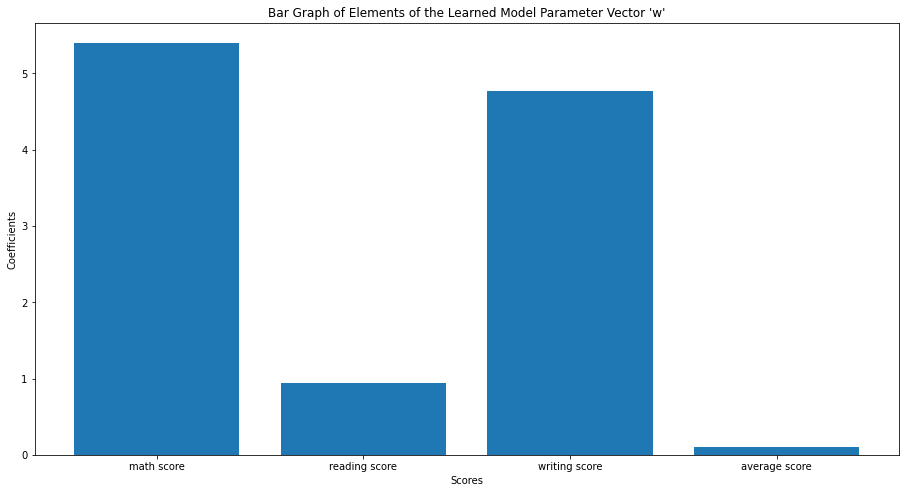

In [21]:
#Now that we have the best hyperparameter, we retrain the model:
clf = LogisticRegression(penalty='l2', C=100, solver='lbfgs')
clf.fit(X_train_val, y_train_val)

# evaluate the model on the testing set
y_test_pred = clf.predict(X_test)


acc = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)

#Visualizing the elements of the learned model parameter vector w with a bar plot:
print("accuracy: {:.3f}, recall: {:.3f}, precision: {:.3f}, f1: {:.3f},".format(acc, recall, precision, f1))

print("Our learned model parameter vector 'w': ", abs(clf.coef_[0]))

fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
labels = ['math score', 'reading score', 'writing score', 'average score']
coefficients = abs(clf.coef_[0])
ax.bar(labels, coefficients)
plt.title("Bar Graph of Elements of the Learned Model Parameter Vector 'w'")
plt.xlabel('Scores')
plt.ylabel('Coefficients')
plt.show()

From this bar graph, we can see that some scores have much greater coefficients in the learned model parameter than others. Specifically, math and writing scores have the higher coefficient values. This means that these scores were able to fit the logistic regression model with the hyperparameter best of all of the features. One could say that, of the scores provided, the math and writing scores are the best predictors of a student's gender. The closer the coefficient values are to 0, the less correlation exists (that is why we took the absolute value). Thus, the reading and average scores are not good predictors of one's gender. One can then say that there is not a clear distinction between which gender performs better on reading examinations (no correlation). It makes sense for the average score to not be a good predictor of one's gender because this score value is not representative of a single subject/category nor the person's actual score (it is an average). 

It should be noted that, although we took the absolute value of the coefficients, a positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.

In [22]:
report = classification_report(y_test, y_test_pred, output_dict=True)
filename = 'LogisticRegressionGender'
pd.DataFrame(report).transpose().to_csv(f'../Data/baseline_results/{filename}.csv')
pd.DataFrame(report).transpose().head()

,precision,recall,f1-score,support
0,0.875000,0.919192,0.896552,99.000
1,0.916667,0.871287,0.893401,101.000
accuracy,0.895000,0.895000,0.895000,0.895
macro avg,0.895833,0.895240,0.894976,200.000
weighted avg,0.896042,0.895000,0.894961,200.000


## Decision Tree Regressor:

### Reading in Data/CSV File:

In [30]:
labelEncoded = pd.read_csv('../Data/dataLabelEncoded.csv')
labelEncoded

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score,Math_Pass_Status,Reading_Pass_Status,Writing_Pass_Status,Overall_Pass_Status,Grade
0,0,1,1,1,1,72,72,74,72.666667,1,1,1,1,2
1,0,2,4,1,0,69,90,88,82.333333,1,1,1,1,1
2,0,1,3,1,1,90,95,93,92.666667,1,1,1,1,0
3,1,0,0,0,1,47,57,44,49.333333,0,0,0,0,5
4,1,2,4,1,1,76,78,75,76.333333,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95,94.000000,1,1,1,1,0
996,1,2,2,0,1,62,55,55,57.333333,1,0,0,0,4
997,0,2,2,0,0,59,71,65,65.000000,0,1,1,0,3
998,0,3,4,1,0,68,78,77,74.333333,1,1,1,1,2


### Splitting the Dataset:

In [49]:
#The dataset will be split into a training set with 80% of samples and a test set with 20% of samples
#The training set is used to learn model parameters and the testing set is used to evaluate the learned model

#Splitting the samples:
student_performance_fea = labelEncoded.drop(['reading score','writing score','math score','average score', 'Math_Pass_Status', 'Reading_Pass_Status', 'Writing_Pass_Status', 'Overall_Pass_Status', 'Grade'], axis=1).values
target = labelEncoded['average score'].values

X_train, X_test, Y_train, Y_test = train_test_split(student_performance_fea,
                                                 target,
                                                 test_size=0.2,
                                                 random_state=1)
print(X_train.shape)
print(X_test.shape)
#It makes sense that there are 800 values in the training set because this is 80% of the total number of values.
#It then also makes sense that there are 200 values in the testing set because this is 20% of the total number of values.

#Normalizing the features:
# normalizer = StandardScaler()
# X_train = normalizer.fit_transform(X_train)
# X_test = normalizer.transform(X_test)

(800, 5)
(200, 5)


In [50]:
# Building the Decision Tree Model through Scikit Learn:

# Create Decision Tree regressor object
clf = DecisionTreeRegressor()

# Train Decision Tree Regressor
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [51]:
#Model Evaluation:
reg_metrics(Y_test, y_pred, 'DecisionTreeRegressor')

Prediction for the testing set:
MAE is: 11.491719664594665
MSE is: 212.67447977795615
RMSE is: 14.58336311616618
R^2 is: -0.005353504025444877


In [52]:
# report = classification_report(Y_test, y_pred, output_dict=True)
# filename = 'decisionTreeRegressor'
# pd.DataFrame(report).transpose().to_csv(f'../Data/baseline_results/{filename}.csv')
# pd.DataFrame(report).transpose().head()

In [53]:
# pip install graphviz

In [54]:
# pip install pydotplus

In [55]:
# conda install graphviz

In [56]:
# from sklearn.tree import export_graphviz
# from six import StringIO  
# from IPython.display import Image  
# import pydotplus

# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('dtr.png')
# Image(graph.create_png())

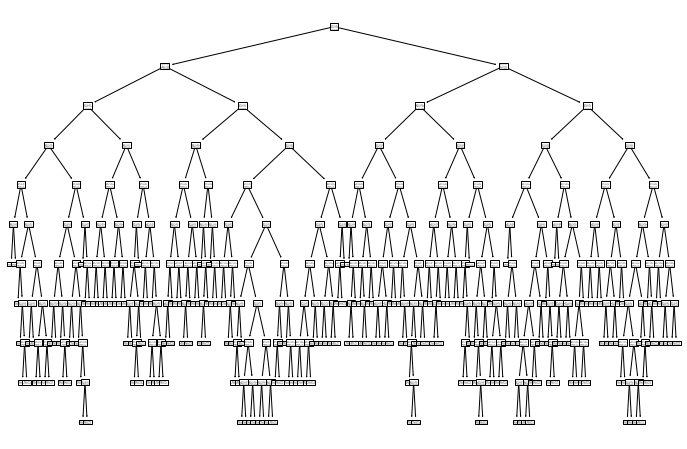

In [57]:
plt.figure(figsize = (12,8))
tree.plot_tree(clf)
plt.show()

## Decision Tree Classifier:

### Splitting the Dataset:

In [58]:
#The dataset will be split into a training set with 80% of samples and a test set with 20% of samples
#The training set is used to learn model parameters and the testing set is used to evaluate the learned model

#Splitting the samples:
student_performance_fea = labelEncoded.drop(['reading score','writing score','math score','average score', 'Math_Pass_Status', 'Reading_Pass_Status', 'Writing_Pass_Status', 'Overall_Pass_Status', 'Grade'], axis=1).values
target = labelEncoded['Overall_Pass_Status'].values

X_train, X_test, Y_train, Y_test = train_test_split(student_performance_fea,
                                                 target,
                                                 test_size=0.2,
                                                 random_state=1)
print(X_train.shape)
print(X_test.shape)
#It makes sense that there are 800 values in the training set because this is 80% of the total number of values.
#It then also makes sense that there are 200 values in the testing set because this is 20% of the total number of values.

#Normalizing the features:
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

(800, 5)
(200, 5)


In [59]:
# Building the Decision Tree Model through Scikit Learn:

# Create Decision Tree Classifier object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [60]:
#Model Evaluation:
print("Accuracy Score is: {}".format(accuracy_score(Y_test, y_pred)))

Accuracy Score is: 0.59


In [61]:
report = classification_report(Y_test, y_pred, output_dict=True)
filename = 'decisionTreeClassifier'
pd.DataFrame(report).transpose().to_csv(f'../Data/baseline_results/{filename}.csv')
pd.DataFrame(report).transpose().head()

,precision,recall,f1-score,support
0,0.525000,0.488372,0.506024,86.00
1,0.633333,0.666667,0.649573,114.00
accuracy,0.590000,0.590000,0.590000,0.59
macro avg,0.579167,0.577519,0.577798,200.00
weighted avg,0.586750,0.590000,0.587847,200.00


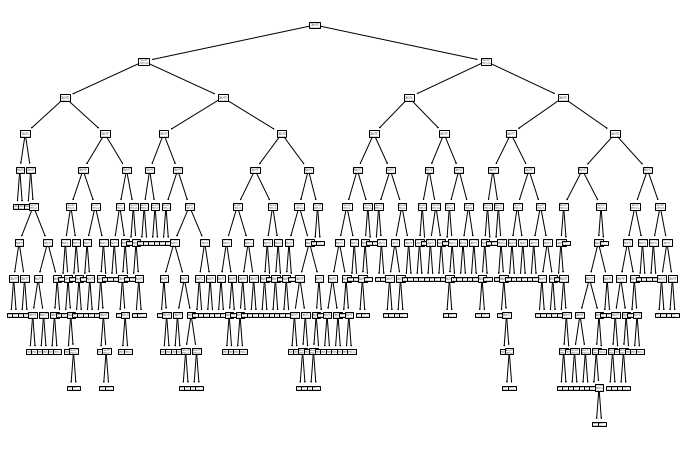

In [62]:
plt.figure(figsize = (12,8))
tree.plot_tree(clf)
plt.show()

## Random Forest Classifier:

In [63]:
randomForestdf = labelEncoded.drop(['reading score','writing score','math score','average score', 'Math_Pass_Status', 'Reading_Pass_Status', 'Writing_Pass_Status', 'Grade'], axis=1)
rf = RandomForestClassifier()
rfResults = get_baseline_results_for_single_classifier(randomForestdf, 'Overall_Pass_Status', rf, 'RandomForestClassifier')
pd.DataFrame(rfResults).transpose().head()

,precision,recall,f1-score,support
0,0.436364,0.311688,0.363636,77.00
1,0.634483,0.747967,0.686567,123.00
accuracy,0.580000,0.580000,0.580000,0.58
macro avg,0.535423,0.529828,0.525102,200.00
weighted avg,0.558207,0.580000,0.562239,200.00


## Random Forest Regressor:

In [64]:
rfRegressordf = labelEncoded.drop(['reading score','writing score','math score', 'Math_Pass_Status', 'Reading_Pass_Status', 'Writing_Pass_Status', 'Overall_Pass_Status', 'Grade'], axis=1)
X, y = rfRegressordf.drop('average score', axis=1), rfRegressordf['average score']
X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.2)
# normalizer = StandardScaler()
# X_tr = normalizer.fit_transform(X_tr)
# X_te = normalizer.transform(X_te)

rfR = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rfR.fit(X_tr, y_tr);
y_pred = rfR.predict(X_te)
reg_metrics(y_te, y_pred, 'RandomForestRegressor')

Prediction for the testing set:
MAE is: 10.772240181448465
MSE is: 186.02911489270775
RMSE is: 13.639249058973435
R^2 is: 0.07840701325192478


## Random Forest Regressor No Params:

In [65]:
rfRegressordf = labelEncoded.drop(['reading score','writing score','math score', 'Math_Pass_Status', 'Reading_Pass_Status', 'Writing_Pass_Status', 'Overall_Pass_Status', 'Grade'], axis=1)
X, y = rfRegressordf.drop('average score', axis=1), rfRegressordf['average score']
X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.2)
# normalizer = StandardScaler()
# X_tr = normalizer.fit_transform(X_tr)
# X_te = normalizer.transform(X_te)

rfR = RandomForestRegressor()
rfR.fit(X_tr, y_tr);
y_pred = rfR.predict(X_te)
reg_metrics(y_te, y_pred, 'RandomForestRegressorNoParams')

Prediction for the testing set:
MAE is: 11.087097241009353
MSE is: 188.3319157640991
RMSE is: 13.723407585730998
R^2 is: 0.009141184559063764


As we can see, having no parameters for adaboost regressor (specifically, not defining the number of estimators) ends up decreasing our R^2 value.

## AdaBoost Classifier:

In [66]:
ab = AdaBoostClassifier()
abResults = get_baseline_results_for_single_classifier(randomForestdf, 'Overall_Pass_Status', ab, 'AdaBoostClassifier')
pd.DataFrame(abResults).transpose().head()

,precision,recall,f1-score,support
0,0.714286,0.426829,0.534351,82.000
1,0.688742,0.881356,0.773234,118.000
accuracy,0.695000,0.695000,0.695000,0.695
macro avg,0.701514,0.654093,0.653793,200.000
weighted avg,0.699215,0.695000,0.675292,200.000


## AdaBoost Regressor:

In [67]:
abRegressordf = rfRegressordf.copy()
X, y = abRegressordf.drop('average score', axis=1), abRegressordf['average score']
X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.2)
# normalizer = StandardScaler()
# X_tr = normalizer.fit_transform(X_tr)
# X_te = normalizer.transform(X_te)

abR = AdaBoostRegressor(n_estimators = 100, random_state = 42)
abR.fit(X_tr, y_tr);
y_pred = abR.predict(X_te)
reg_metrics(y_te, y_pred, 'AdaBoostRegressor')

Prediction for the testing set:
MAE is: 11.345352051034599
MSE is: 194.02809723501193
RMSE is: 13.929396872622013
R^2 is: 0.13763985931139977


## AdaBoost Regressor No Params:

In [68]:
abRegressordf = rfRegressordf.copy()
X, y = abRegressordf.drop('average score', axis=1), abRegressordf['average score']
X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.2)
# normalizer = StandardScaler()
# X_tr = normalizer.fit_transform(X_tr)
# X_te = normalizer.transform(X_te)

abR = AdaBoostRegressor()
abR.fit(X_tr, y_tr);
y_pred = abR.predict(X_te)
reg_metrics(y_te, y_pred, 'AdaBoostRegressorNoParams')

Prediction for the testing set:
MAE is: 9.56439699650633
MSE is: 138.62514795804705
RMSE is: 11.773918122615218
R^2 is: 0.23839515272649314


As we can see, having no parameters for adaboost regressor (specifically, not defining the number of estimators) ends up increasing our R^2 value.

## XGBoost Classifer:

NOTE: FOR ALL XGBOOST MODELS I TRY, THE METRICS END UP VARYING WIDLEY WHEN RERUNNING THE CELLS!!!

In [106]:
xg_clas = xgb.XGBClassifier(objective ='reg:logistic', n_estimators = 100, use_label_encoder=False)
xgResults = get_baseline_results_for_single_classifier(randomForestdf, 'Overall_Pass_Status', xg_clas, 'XGBoostClassifier')
pd.DataFrame(xgResults).transpose().head()

,precision,recall,f1-score,support
0,0.557377,0.409639,0.472222,83.00
1,0.647482,0.769231,0.703125,117.00
accuracy,0.620000,0.620000,0.620000,0.62
macro avg,0.602430,0.589435,0.587674,200.00
weighted avg,0.610088,0.620000,0.607300,200.00


## XGBoost Classifer No Params:

In [107]:
xg_clas = xgb.XGBClassifier(use_label_encoder=False)
xgResults = get_baseline_results_for_single_classifier(randomForestdf, 'Overall_Pass_Status', xg_clas, 'XGBoostClassifierNoParams')
pd.DataFrame(xgResults).transpose().head()

[19:04:21] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,precision,recall,f1-score,support
0,0.500000,0.407407,0.448980,81.000
1,0.641791,0.722689,0.679842,119.000
accuracy,0.595000,0.595000,0.595000,0.595
macro avg,0.570896,0.565048,0.564411,200.000
weighted avg,0.584366,0.595000,0.586343,200.000


## XGBoost Regressor:

In [109]:
xgRegressordf = rfRegressordf.copy()
X, y = xgRegressordf.drop('average score', axis=1), xgRegressordf['average score']
X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.2)
# normalizer = StandardScaler()
# X_tr = normalizer.fit_transform(X_tr)
# X_te = normalizer.transform(X_te)

xg_reg = xgb.XGBRegressor(objective ='reg:linear', n_estimators = 100, use_label_encoder=False)
xg_reg.fit(X_tr, y_tr);
y_pred = xg_reg.predict(X_te)
reg_metrics(y_te, y_pred, 'XGBoostRegressor')

[19:06:38] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
Prediction for the testing set:
MAE is: 11.948217951456709
MSE is: 229.98314238900343
RMSE is: 15.165195098942956
R^2 is: -0.0230686170029617


## XGBoost Regressor No Params:

In [110]:
xgRegressordf = rfRegressordf.copy()
X, y = xgRegressordf.drop('average score', axis=1), xgRegressordf['average score']
X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.2)
# normalizer = StandardScaler()
# X_tr = normalizer.fit_transform(X_tr)
# X_te = normalizer.transform(X_te)

xg_reg = xgb.XGBRegressor(use_label_encoder=False)
xg_reg.fit(X_tr, y_tr);
y_pred = xg_reg.predict(X_te)
reg_metrics(y_te, y_pred, 'XGBoostRegressorNoParams')

Prediction for the testing set:
MAE is: 12.250537630716961
MSE is: 223.24367182252053
RMSE is: 14.941341031598219
R^2 is: -0.049704545000881506


## Bias-Variance Decomposition:

In [33]:
one_hot_norm_droppped = df.drop(['reading score','writing score','math score','Overall_Pass_Status'], axis=1)
label_encoded_dropped = labelEncoded.drop(['reading score','writing score','math score', 'Math_Pass_Status', 'Reading_Pass_Status', 'Writing_Pass_Status', 'Overall_Pass_Status', 'Grade'], axis=1)

In [22]:
lr = LinearRegression()
avg_expected_loss_lr, avg_bias_lr, avg_var_lr = decompose_error(lr, one_hot_norm_droppped, 'average score', loss='mse')

Average Expected Loss:  0.8508845336980733
Average Bias:  0.8375760323489083
Average Variance:  0.013308501349164835


In [28]:
rr = Ridge(alpha = 0.1)
avg_expected_loss_rr, avg_bias_rr, avg_var_rr = decompose_error(rr, one_hot_norm_droppped, 'average score', loss='mse')

Average Expected Loss:  0.7863479823906598
Average Bias:  0.774190294892472
Average Variance:  0.012157687498187797


In [34]:
dt = DecisionTreeRegressor()
avg_expected_loss_dt, avg_bias_dt, avg_var_dt = decompose_error(dt, label_encoded_dropped, 'average score', loss='mse')

Average Expected Loss:  240.5762450669887
Average Bias:  194.4190761630137
Average Variance:  46.157168903975084


In [35]:
rfR = RandomForestRegressor(n_estimators = 1000, random_state = 42)
avg_expected_loss_rfR, avg_bias_rfR, avg_var_rfR = decompose_error(rfR, label_encoded_dropped, 'average score', loss='mse')

Average Expected Loss:  218.48094561258986
Average Bias:  188.2096239037742
Average Variance:  30.271321708815567


In [36]:
rfRnp = RandomForestRegressor()
avg_expected_loss_rfRnp, avg_bias_rfRnp, avg_var_rfRnp = decompose_error(rfRnp, label_encoded_dropped, 'average score', loss='mse')

Average Expected Loss:  240.6732643738301
Average Bias:  208.43947011470402
Average Variance:  32.23379425912596


In [40]:
abR = AdaBoostRegressor(n_estimators = 1000, random_state = 42)
avg_expected_loss_abR, avg_bias_abR, avg_var_abR = decompose_error(abR, label_encoded_dropped, 'average score', loss='mse')

Average Expected Loss:  189.95119205535505
Average Bias:  183.83900657815596
Average Variance:  6.112185477198951


In [41]:
abRnp = AdaBoostRegressor()
avg_expected_loss_abR, avg_bias_abRnp, avg_var_abRnp = decompose_error(abRnp, label_encoded_dropped, 'average score', loss='mse')

Average Expected Loss:  151.13129705273582
Average Bias:  144.61909218837482
Average Variance:  6.512204864361027


In [42]:
xgr = xgb.XGBRegressor(objective ='reg:linear', n_estimators = 100, use_label_encoder=False)
avg_expected_loss_xgr, avg_bias_xgr, avg_var_xgr = decompose_error(xgr, label_encoded_dropped, 'average score', loss='mse')

[22:21:11] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[22:21:12] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[22:21:12] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[22:21:13] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[22:21:13] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[22:21:14] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[22:21:14] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objecti

In [43]:
xgrnp = xgb.XGBRegressor(use_label_encoder=False)
avg_expected_loss_xgrnp, avg_bias_xgrnp, avg_var_xgrnp = decompose_error(xgrnp, label_encoded_dropped, 'average score', loss='mse')

Average Expected Loss:  227.7847897585808
Average Bias:  187.26753506086453
Average Variance:  40.51725469771627


In [44]:
x = ["Bias", "Variance"]
y_dt = [avg_bias_dt, avg_var_dt]
y_rfR = [avg_bias_rfR, avg_var_rfR]
y_xgb = [avg_bias_xgb, avg_var_xgb]
y_abR = [avg_bias_abR, avg_var_abR]
y_vals = [y_dt, y_rfR, y_xgb, y_abR]

NameError: name 'avg_bias_xgb' is not defined

In [ ]:
data = pd.DataFrame({
        "metric":["bias", "variance", "bias","variance","bias","variance","bias","variance"],
        "values":[y_dt[0], y_dt[1], y_rfR[0], y_rfR[1], y_abR[0], y_abR[1], y_xgb[0], y_xgb[1]],
        "classifier":["Decision Tree","Decision Tree","Random Forest", "Random Forest", "AdaBoost", "AdaBoost", "XGBoost", "XGBoost"]
    })